# 차원축소 Assignment1

# ''' ? ''' 이 있는 부분을 채워주세요 

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

무작정 빈칸 채우기가 아니라 꼭 차원축소 과정을 이해하시면서 과제를 진행하시면 좋겠습니다!!!

또 질문은 언제나 환영이니 과제하다가 궁금하신것 있으시면 자유롭게 물어보세요!!

# 1) PCA의 과정 차근차근 밟아보기

In [2]:
#기본 모듈 불러오기
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
#설명변수 x1, x2, x3
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

In [4]:
#   설명변수들을 하나의 행렬로
X = np.stack((x1,x2,x3),axis=0)

In [5]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [6]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


### 1-1) 먼저 PCA를 시작하기 전 데이터 scaling!!!! 매우 중요합니다!

https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html?highlight=%EC%A0%84%EC%B2%98%EB%A6%AC  를 참고하시면 도움이 될거에요

In [34]:
#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
ma_scaler = MaxAbsScaler()
rb_scaler = RobustScaler()

X_std = std_scaler.fit_transform(X)
X_mm = mm_scaler.fit_transform(X)
X_ma = ma_scaler.fit_transform(X)
X_rb = rb_scaler.fit_transform(X)

### Scaler 종류(StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler)
#### StandardScaler: 평균을 제거하고 데이터를 단위 분산으로 조정한다.
#### MinMaxScaler: 모든 feautre 값이 0~1사이에 있도록 데이터를 조정한다.
#### MaxAbsScaler: 절대값이 0~1사이에 매핑되도록 한다. 즉 -1 ~ 1사이로 재조정한다.
#### RobustScaler: 중앙값과 IQR을 사용해서 이상치에 대한 영향을 최소화한 기법이다.
https://mkjjo.github.io/python/2019/01/10/scaler.html

### 각 Scaler들을 시각화한 코드

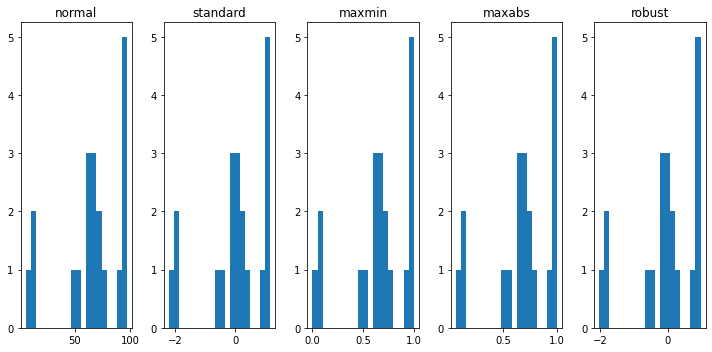

In [69]:
data = np.stack((X.values[:,0],X_std[:,0], X_mm[:,0], X_ma[:,0], X_rb[:,0]), axis=0)
titles = ['normal','standard','maxmin','maxabs','robust'] 

fig, ax = plt.subplots(1,5, figsize=(10,5))
ax = ax.ravel()
for idx,ax in enumerate(ax):
    ax.hist(data[idx], bins=20)
    ax.set_title(titles[idx])
plt.tight_layout()

In [67]:
features = X_std.T

In [114]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

### 1-2) 다음으로 공분산 행렬을 구합니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

## $\sum = \frac{1}{n-1}X^TX$

In [110]:
# numpy 모듈에 의해 구해진 값
cov = np.cov(features)

# 직접 수식에 의해 구한 값
n = features.shape[-1]
cov_self = features@features.T/(n-1)

# cov 와 cov_self가 같은지 비교
print(cov.round(5)==cov_self.round(5))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


### 1-3) 이제 고유값과 고유벡터를 구합니다

실습코드를 참고해주세요

## $\sum P = \lambda P$
## $(\sum-\lambda I)P = 0$
## $Det(\sum-\lambda I) = 0$

In [177]:
import numpy.linalg as lin

eigenvalues, eigenvectors = lin.eig(cov)

# 고유값들의 합은 각 축에 분산의 합과 같다.
print(eigenvalues.sum().round(5) == (cov[0,0] + cov[1,1] + cov[2,2]).round(5))

True


### 1-4) 고유값 분해: 고유값 분해의 곱으로 원래 공분산 행렬을 구해봅니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해주세요

A = 𝑃Λ𝑃`
이 식 기억나죠?

In [178]:
# eigenvalues들을 대각행렬로 만들어주는 식
diag = eigenvalues * np.identity(len(eigenvalues))
# 원래의 cov을 구하는 식
A = eigenvectors@diag@lin.inv(eigenvectors)

# 원래 공분산 행렬과 값이 같은지 비교
print(A.round(5)==cov.round(5))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


### 1-5) 마지막으로 고유 벡터 축으로 값을 변환합니다


https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [199]:
def new_coordinates(X,eigenvectors):
    result = None
    for e_vec in eigenvectors:
        if result is not None:
            result = np.concatenate((result, np.array([X@e_vec])))
        else :
            result = np.array([X@e_vec])
    return result.T

In [200]:
new_coordinates(X_std, eigenvectors.T)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해보기

위의 과정을 하나의 함수로 표현해주세요!

1)에서 진행한 과정을 그대로 가져오면 됩니다..! , 

위에서 만든 함수(new_coordinate)도 가져오셔서 사용해도 좋아요!

+하지만 이 함수는 number이라는 인자를 받아서 pca에서 주성분 개수를 고려하도록 합니다!

고유값이 큰 축 순서로 정렬하는 과정 + 주성분 개수 number을 고려해야한다는 점을 유의해서 함수를 정의해주세요


In [226]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
  # Scaling
    std_scaler = StandardScaler()
    X_std = std_scaler.fit_transform(X)
    features = X_std.T
    
  # Covariance
    cov = np.cov(features)
    
  # eigenvalues, eigenvectors
    eigenvalues, eigenvectors = lin.eig(cov)
    eigenvectors = eigenvectors.T
    
  #np.dot(np.dot(eigenvectors,mat),eigenvectors.T)
    diag = eigenvalues * np.identity(len(eigenvalues))
    A = eigenvectors@diag@lin.inv(eigenvectors)
    
  # 고유값 정렬 및 고유값 크기에 따라 고유벡터도 정렬
    argsort = np.argsort(-eigenvalues)
    eigenvectors = eigenvectors[argsort]

  #def new_coordinates(X,eigenvectors):
    result = None
    for e_vec in eigenvectors:
        if result is not None:
            result = np.concatenate((result, np.array([X_std@e_vec])))
        else :
            result = np.array([X_std@e_vec])

  #return new.T #새로운 축으로 변환되어 나타난 데이터 return
    return result.T

In [227]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 
# 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해보기

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [231]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [233]:
pca.fit_transform(X_std)

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [234]:
MYPCA(X,3)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

##### 두 PCA결과를 보면 첫번째 열의 부호가 반대로 되어있는 것을 알 수 있다.
##### 그 이유는 sklearnPCA와 MYPCA의 단위기저벡터가 서로 다르기 때문이다. 

In [240]:
pca.components_

array([[-0.47018528,  0.64960236,  0.59744671],
       [-0.85137353, -0.15545725, -0.50099516],
       [-0.23257022, -0.74421087,  0.62614797]])

In [241]:
eigenvectors

array([[ 0.47018528, -0.85137353, -0.23257022],
       [-0.64960236, -0.15545725, -0.74421087],
       [-0.59744671, -0.50099516,  0.62614797]])